In [ ]:
import sklearn
import os
from tqdm.autonotebook import tqdm
import numpy as np
from PIL import Image
import pandas as pd
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential, load_model, Model 
from keras.layers import Conv2D, MaxPool2D, Add, Dense, Reshape, Flatten, Dropout, BatchNormalization, ReLU, Activation, Concatenate, Flatten, Input, Concatenate, Activation, LSTM, Bidirectional, Lambda
from keras import Input
from keras import backend
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# check GPU
!nvidia-smi

Wed Jul 27 16:16:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!unzip "/content/gdrive/MyDrive/AI Draw Equation/dataset.zip" -d "/content"

Streaming output truncated to the last 5000 lines.
  inflating: /content/COMPLETED DATASET/dec/675.png  
  inflating: /content/COMPLETED DATASET/dec/676.png  
  inflating: /content/COMPLETED DATASET/dec/677.png  
  inflating: /content/COMPLETED DATASET/dec/678.png  
  inflating: /content/COMPLETED DATASET/dec/679.png  
  inflating: /content/COMPLETED DATASET/dec/68.png  
  inflating: /content/COMPLETED DATASET/dec/680.png  
  inflating: /content/COMPLETED DATASET/dec/681.png  
  inflating: /content/COMPLETED DATASET/dec/682.png  
  inflating: /content/COMPLETED DATASET/dec/683.png  
  inflating: /content/COMPLETED DATASET/dec/684.png  
  inflating: /content/COMPLETED DATASET/dec/685.png  
  inflating: /content/COMPLETED DATASET/dec/686.png  
  inflating: /content/COMPLETED DATASET/dec/687.png  
  inflating: /content/COMPLETED DATASET/dec/688.png  
  inflating: /content/COMPLETED DATASET/dec/689.png  
  inflating: /content/COMPLETED DATASET/dec/69.png  
  inflating: /content/COMPLETED D

In [ ]:
# Load dataset
list_categories = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "add", "dec", "div", "mul", "stroke", "sub", "(", ")"]
images = []
labels = []
dataset_path = "/content/COMPLETED DATASET"
for label_folder in os.listdir(dataset_path):
  curr_path = os.path.join(dataset_path, label_folder)
  lbl = list_categories.index(label_folder)
  for img_name in os.listdir(curr_path):
    img = cv2.imread(os.path.join(curr_path, img_name), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(int(lbl))
images = np.array(images) / 255.0
labels = np.array(labels)
print(len(images))
print(len(labels))

19007
19007


In [ ]:
labels = to_categorical(labels)

In [ ]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(images, labels, test_size=0.1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size = 0.2)

del images
del labels

In [ ]:
# Define model
input_img = Input(shape=(100, 100 , 1), name="input")
x = Conv2D(filters = 6, kernel_size = (5, 5), padding = "same", activation = "sigmoid")(input_img)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(filters = 16, kernel_size = (5, 5), padding = "same", activation = "sigmoid")(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(18, activation='softmax')(x)
model = Model(inputs = input_img, outputs = output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7744)              0     

In [ ]:
lr = 0.005
opt = keras.optimizers.Adam(learning_rate = lr)
model.compile(loss='categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
train = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs = 50, batch_size = 32, verbose = 1)  

Epoch 1/50
428/428 [==============================] - 15s 8ms/step - loss: 2.5444 - accuracy: 0.2195 - val_loss: 1.7193 - val_accuracy: 0.4649
Epoch 2/50
428/428 [==============================] - 3s 7ms/step - loss: 1.5428 - accuracy: 0.5001 - val_loss: 1.2970 - val_accuracy: 0.5801
Epoch 3/50
428/428 [==============================] - 3s 6ms/step - loss: 1.2422 - accuracy: 0.5900 - val_loss: 1.1159 - val_accuracy: 0.6344
Epoch 4/50
428/428 [==============================] - 3s 6ms/step - loss: 1.0669 - accuracy: 0.6459 - val_loss: 0.9378 - val_accuracy: 0.6888
Epoch 5/50
428/428 [==============================] - 3s 7ms/step - loss: 0.9467 - accuracy: 0.6821 - val_loss: 1.0204 - val_accuracy: 0.6558
Epoch 6/50
428/428 [==============================] - 3s 7ms/step - loss: 0.8686 - accuracy: 0.7040 - val_loss: 0.8368 - val_accuracy: 0.7151
Epoch 7/50
428/428 [==============================] - 3s 6ms/step - loss: 0.7690 - accuracy: 0.7439 - val_loss: 0.7895 - val_accuracy: 0.7379
Epoch

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Loss = ", test_loss)
print("Accuracy = ", test_accuracy * 100)

Loss =  0.7342249155044556
Accuracy =  89.63703513145447


[[2.5406448e-04 9.3471996e-08 4.8168273e-05 1.3881773e-02 9.6677411e-01
  9.9822355e-04 3.5449289e-04 3.0913157e-05 3.3286638e-06 1.5876155e-03
  9.1202045e-03 3.6150628e-14 6.9468496e-03 2.2502242e-07 1.3579835e-13
  2.2288131e-09 4.8224008e-17 2.1116957e-09]]
4
4


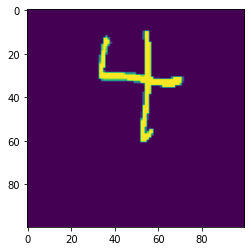

In [ ]:
i = 15
y_pred = model.predict(X_test[i].reshape(1, 100, 100, 1))
plt.imshow(X_test[i])
print(y_pred)
print(np.argmax(y_pred))
print(list_categories[np.argmax(y_pred)])

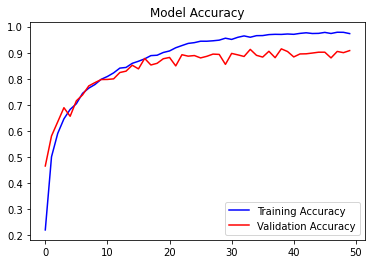

In [ ]:
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

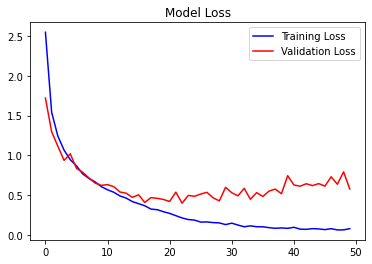

In [ ]:
train_loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(train_loss))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [ ]:
model_json = model.to_json()
with open(f"/content/gdrive/MyDrive/AI Draw Equation/Model/Lenet lr={lr}.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights(f"/content/gdrive/MyDrive/AI Draw Equation/Model/Lenet lr={lr}.h5")